In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [136]:
customer_data=pd.read_excel("Credit Card Customer Data.xlsx")

In [137]:
customer_data.shape

(660, 7)

In [138]:
customer_data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [139]:
customer_data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [140]:
# Check for null values
customer_data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [141]:
# Any negative values?
customer_data.lt(0).sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [142]:
customer_data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

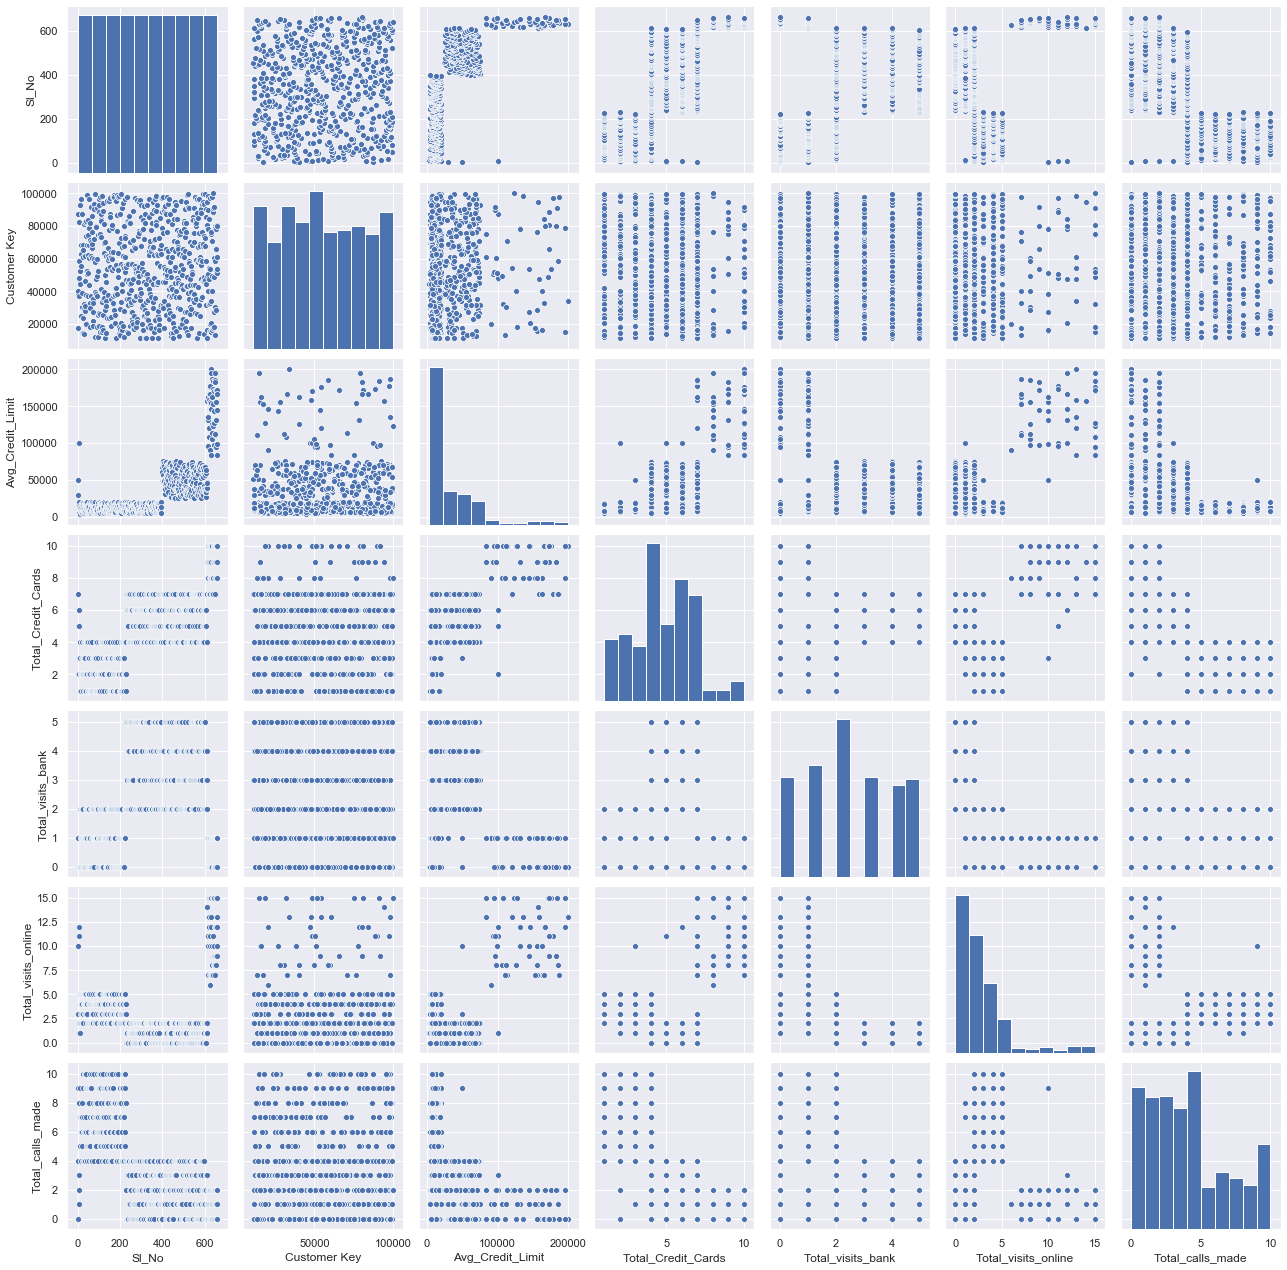

In [143]:
sns.pairplot(customer_data)

In [144]:
# Drop irrelevant data
customer_data.drop(columns=['Sl_No', 'Customer Key'], inplace=True)

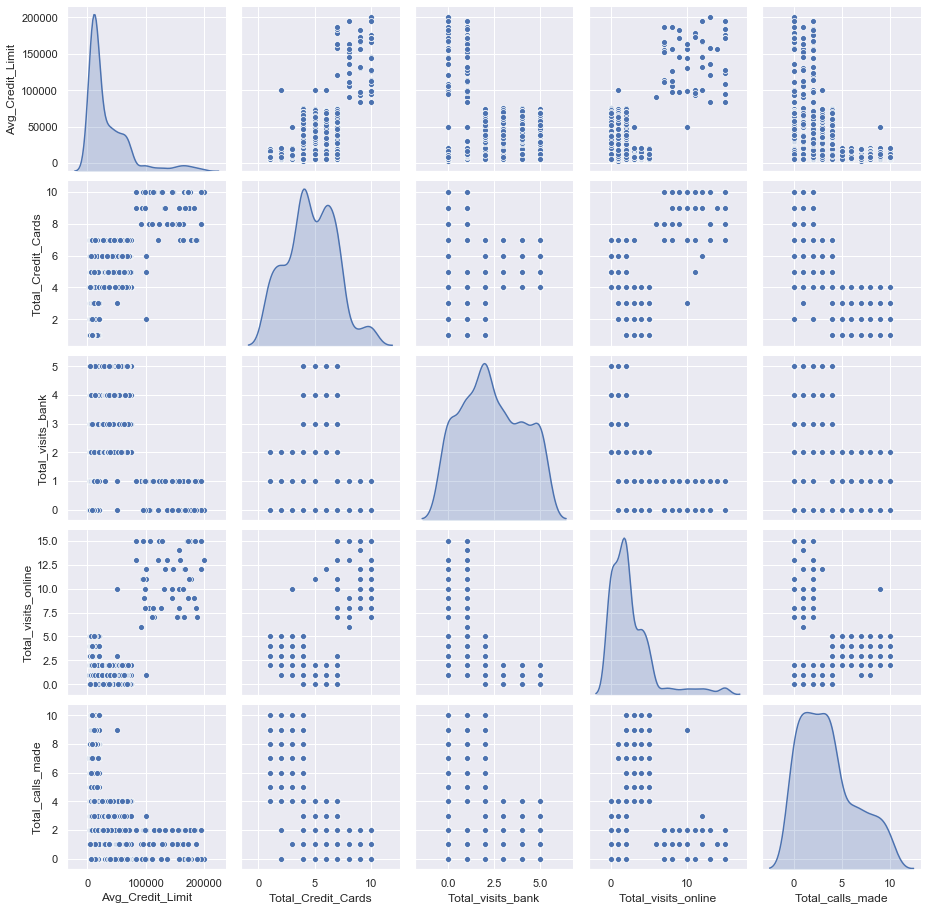

In [145]:
sns.pairplot(customer_data, diag_kind='kde')

Based on the humps in the histograms it appears that there may be atleast 3 distinct kind of customers

In [146]:
customer_data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


Strong correlation between credit limit and total credit cards is kind of expected.
Negative correlation of total bank visits against total online visits and total calls made is also intuitive.
Interesting observation is that customers with more credit cards are likely to make fewer calls.
Another interesting observation is that even though customers with high credit limit are likely make more online visits, there is not such a strong correlation between online visits and total credit cards.

In [147]:
##Scale the data
from scipy.stats import zscore

scaled_data = customer_data.apply(zscore)

In [148]:
scaled_data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,8.195465e-16,-4.006223e-15,1.157323e-16,1.944572e-16,-7.112156e-16
std,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00
min,-8.398081e-01,-1.710864e+00,-1.473731e+00,-8.883795e-01,-1.251537e+00
25%,-6.536229e-01,-7.875852e-01,-8.604506e-01,-5.474897e-01,-9.022711e-01
50%,-4.408398e-01,1.356941e-01,-2.471705e-01,-2.065999e-01,-2.037386e-01
75%,3.570968e-01,5.973337e-01,9.793898e-01,4.751797e-01,4.947938e-01
max,4.399975e+00,2.443892e+00,1.592670e+00,4.224968e+00,2.241125e+00


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

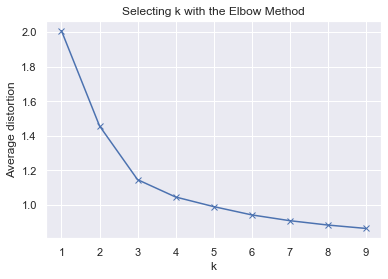

In [149]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_data)
    prediction=model.predict(scaled_data)
    meanDistortions.append(sum(np.min(cdist(scaled_data, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_data
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [150]:
#3 or 4 seem like a good choice of K. Let's pick K=3
kmeans = KMeans(n_clusters=3, n_init = 20, random_state=7)

In [151]:
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [152]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
customer_labeled_data=customer_data.join(df_labels)

In [153]:
customer_labeled_data['labels'].value_counts()

0    386
1    224
2     50
Name: labels, dtype: int64

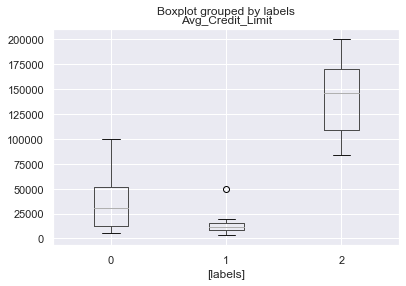

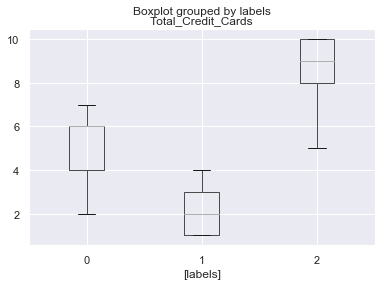

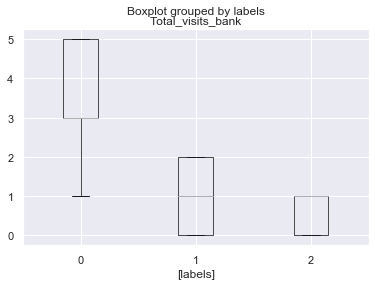

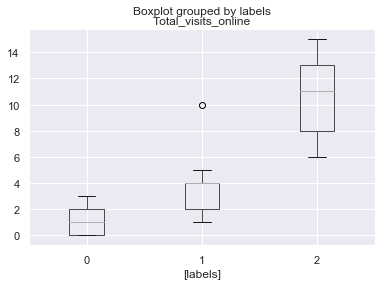

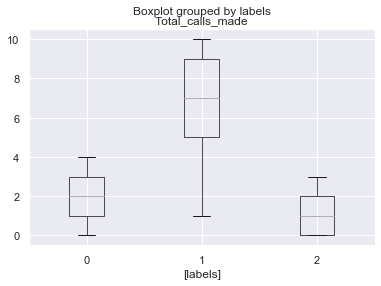

In [154]:
for c in customer_data.columns:
    customer_labeled_data[['labels', c]].boxplot(by = 'labels')

#### Answers to questions based on K-means clusterin
So we can conclude that there are 3 segments of customers:

Segment 0: these customers visit the bank frequently and carry 4-6 credit cards (but not necessarily high credit limit).

Segment 1: These customers carry 1-3 credit cards, have low average credit limit, don't visit the bank often or online, but make frequent calls.

Segment 2: These customers carry many credit cards (8-10), have a high credit limit. They do a lot of online access but don't visit the bank or call the bank frequently.

Based on k-means clustering, suggestions to the marketing team.

Segment 0: These customers visit the bank frequently - so it is crucial that the bank staff are trained to handle such customers well.

Segment 1: These customers make frequent calls, but their credit limit is low and they carry 1-3 credit cards. Since their business may not be top priority, it may be ok to invest less in the call centre.

Segment 2: These are important customers - hence it is essential that the online services are best in class to retain them.

### Hierarchical clustering

In [155]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
methods=['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
for m in methods:
    Z = linkage(scaled_data, m, metric='euclidean')
    ccc, coph_dists_ref = cophenet(Z, pdist(scaled_data))
    print("Cophenetic correlation coefficient with method %s = %0.3f" %(m, ccc))

Cophenetic correlation coefficient with method single = 0.739
Cophenetic correlation coefficient with method complete = 0.860
Cophenetic correlation coefficient with method average = 0.898
Cophenetic correlation coefficient with method weighted = 0.886
Cophenetic correlation coefficient with method centroid = 0.894
Cophenetic correlation coefficient with method median = 0.889
Cophenetic correlation coefficient with method ward = 0.742


In [156]:
#Average method is giving the best cophenetic correlation coefficient
Z = linkage(scaled_data, 'average', metric='euclidean')


dendrogram of customer data


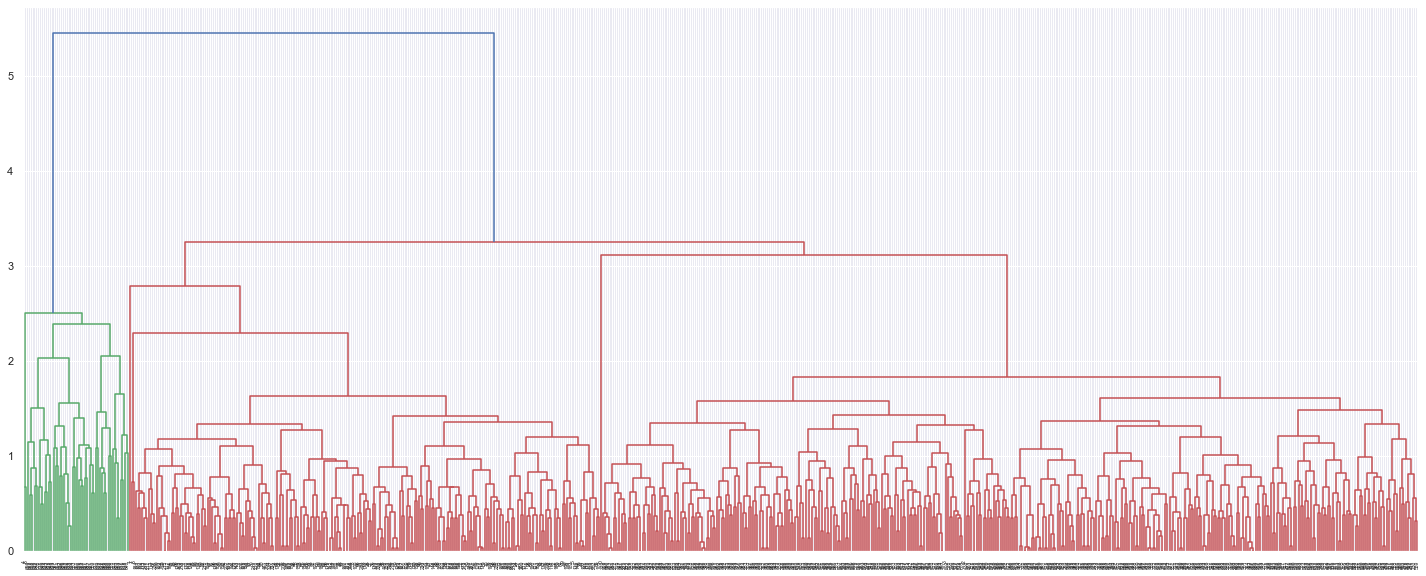

In [157]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
print("dendrogram of customer data")

##### Obviously the number of clusters depends on the dendogram threshold we pick. Let's pick a value of 20 for dendrogram distance, that splits the data into 3 clusters.

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 3.2525392345662776, 3.2525392345662776, 0.0],
  [0.0, 5.454180345752366, 5.454180345752366, 3.2525392345662776]],
 'ivl': ['(50)', '(223)', '(387)'],
 'leaves': [1314, 1315, 1316],
 'color_list': ['g', 'b']}

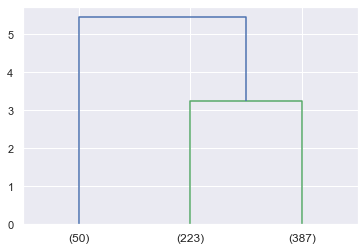

In [158]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)

In [159]:
max_d=3.2

In [160]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [161]:
## creating a new dataframe only for labels and converting it into categorical variable
hc_labels = pd.DataFrame(clusters, columns = list(['labels']))
hc_labels['labels'] = hc_labels['labels'].astype('category')
hc_labeled_data=customer_data.join(hc_labels)

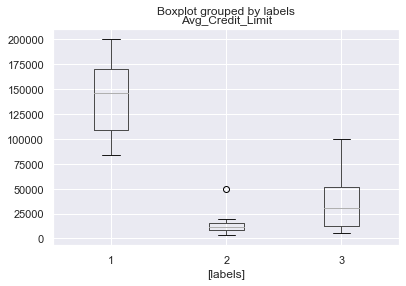

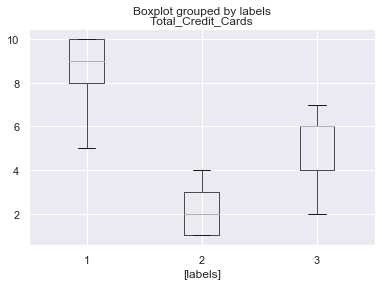

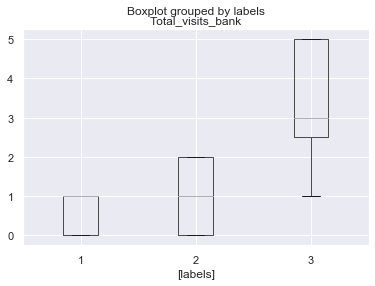

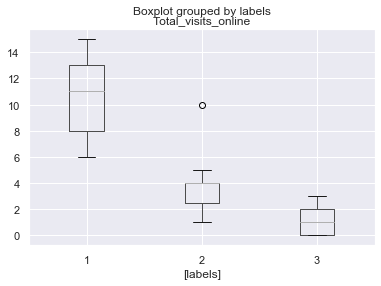

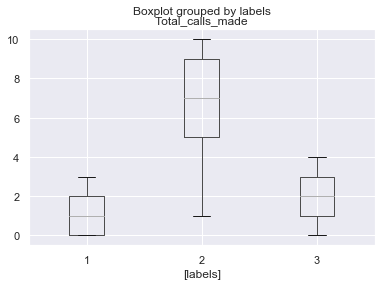

In [162]:
for c in customer_data.columns:
    hc_labeled_data[['labels', c]].boxplot(by = 'labels')

Based on these boxplots, we can describe the 3 clusters as below:

Cluster 1: High credit limit, lot of cards. Do a lot of online banking. But don't visit the bank much or make a lot of calls. These are the most important customers. So bank must invest most in the online banking experience

Cluster 2: Low credit limit, few cards, don't do a lot of online banking or visit the bank. But make a lot of calls. Their business may not be significant, so it is ok to budget a little less to improve the call centre.

Cluster 3: These are intermediate between 1 and 2. Have medium sized credit limit. Carry a fairly high number of cards. Their main way of communication with the bank is physical visit. Don't do too much online banking or calls. The importance of their business is between clusters 1 and 2. So to improve the experience of physical visits, the bank may train the staff accordingly to handle such type of customers.



### Kmeans vs Hierarchical

In [163]:
from sklearn.metrics import silhouette_score
# Let's compute the Kmeans silhouette score first
preds=kmeans.fit_predict(scaled_data)
kmeans_score=silhouette_score(scaled_data, preds)
print("KMeans silhouette score=%0.5f" % kmeans_score)

KMeans silhouette score=0.51572


In [164]:
hiercluster_score=silhouette_score(scaled_data, clusters)
print("Hierarchical clustering silhouette score=%0.5f" % hiercluster_score)

Hierarchical clustering silhouette score=0.51592


In [165]:
# For hierarchical clustering, count the number of customers in each category
hc_labels['labels'].value_counts()

3    387
2    223
1     50
Name: labels, dtype: int64

In [166]:
# For kmeans clustering, count the number of customers in each category
df_labels['labels'].value_counts()

0    386
1    224
2     50
Name: labels, dtype: int64

Kmeans vs hierarchical clustering
Both produced similar conclusions on the different customer segments.
Their silhouette score is also nearly same.
On looking at the number of categories in each category, this count is also almost the same for both methods.

We can say that atleast for this dataset and the chosen number of customer clusters, our inferences are same irrespective of the method used.

### Answers to questions based on hierarchical clustering
Based on these boxplots, we can describe the 3 clusters as below:

Cluster 1: High credit limit, lot of cards. Do a lot of online banking. But don't visit the bank much or make a lot of calls. These are the most important customers. 

Cluster 2: Low credit limit, few cards, don't do a lot of online banking or visit the bank. But make a lot of calls. Their business may not be significant.

Cluster 3: These are intermediate between 1 and 2. Have medium sized credit limit. Carry a fairly high number of cards. Their main way of communication with the bank is physical visit. Don't do too much online banking or calls. The importance of their business is between clusters 1 and 2. 

Suggestions to marketing team:

Cluster1 customers are most important as they bring the most business, so bank must invest most in online banking.

Cluster3 customers are next, so bank must next focus on improving the physical visit experience

Cluster2 customers bring the least business and their primary way of communication is call centre. So the call centre improvement should be the least priority.
